![image](https://d13ezvd6yrslxm.cloudfront.net/wp/wp-content/images/fantasticbeasts-fogler-redmayne-bowtruckle.jpg)


This notebook aims to classify fantastic trees and give some clues about where to find them! Our fantastic tree types are 7 in total and labeled  as `cover_type` in the dataset. The notebook will follow the workflow suggested by Will Koehrsen in this [article](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420).
    
1) Undserstand, Clean and Format Data

2) Exploratory Data Analysis

3) Feature Engineering & Selection

4) Compare Several Machine Learning Models

5) Perform Hyperparameter Tuning on the Best Model

6) Evaluate the Best Model with Test Data

7) Interpret Model Results

8) Summary & Conclusions

If you are dying from curiosity, you can jump directly to *8. Summary & Conclusions*, but I cannot gurantee that you are not going to miss some beautiful visualizations and interesting insights about data science and machine learning. Enjoy Reading!

In [1]:
# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 56)

# for visualization
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
# to include graphs inline within the frontends next to code
import seaborn as sns
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

# machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

# Input data files are available in the "../input/" directory.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/learn-together/test.csv
/kaggle/input/learn-together/train.csv
/kaggle/input/learn-together/sample_submission.csv


# 1. Understand, Clean and Format Data

To understand how data is structured, I am going to look at:
* First and last rows
* Information
* Descriptive statistics of the dataset.

and apply cleaning and formatting afterwards, if necessary.

## 1.1. First and last rows

In [2]:
trees = pd.read_csv("/kaggle/input/learn-together/train.csv")
print("Number of rows and columns in the trees dataset are:", trees.shape)

Number of rows and columns in the trees dataset are: (15120, 56)


In [3]:
trees.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
trees.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,914,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


## 1.2. Information (how many rows and columns, data types and non-null values) and descriptive statistics of the dataset

In [5]:
display(trees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

None

In [6]:
display(trees.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

## 1.3. Findings from Understand, Clean and Format Data
Training dataset (trees dataframe) has 15120 entries and 56 columns with headers appropriately named. Dataset is clean and well-formatted, meaning it had no NA values and every column has a numeric (float or integer) data type. 

`Cover_Type` is our label/target column. `Wilderness_Area` and `Soil_Type` columns might have binary values (0,1) if so, they are the one-hot-encoded columns of 4 wilderness areas and 40 soil types respectively. I am going to start exploratory data analysis by seeking answer to that suspicion.

# 2. Exploratory Data Analysis

## 2.1. Check if Wilderness_Area and Soil_Type columns have only binary values

In [7]:
# list of columns of wilderness areas and soil types
is_binary_columns = [column for column in trees.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(trees[is_binary_columns].values.ravel())

array([1, 0])

Yes, they only have binary values.

## 2.2. Can one Fantastic Tree belong to multiple soil types and wilderness areas ?

In [8]:
# sum of all widerness area columns
trees["w_sum"] = trees["Wilderness_Area1"] + trees["Wilderness_Area2"] + trees["Wilderness_Area3"] + trees["Wilderness_Area4"]
print(trees.w_sum.value_counts())

1    15120
Name: w_sum, dtype: int64


In [9]:
soil_columns = [c for c in trees.columns if "Soil" in c]
trees["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    trees["soil_sum"] += trees[c]

print(trees.soil_sum.value_counts())

1    15120
Name: soil_sum, dtype: int64


In [10]:
trees.drop(columns=["w_sum", "soil_sum"], inplace=True)

`Wilderness_Area` and `Soil_Type1-40` having only binary values and only one `soil_type` or `wilderness_area` being equal to 1, shows that they are one-hot-encoded columns.

One important thing about fantastic trees are, they can only belong to one soil type or one wilderness area.

## 2.3. Distribution of the Fantastic Trees

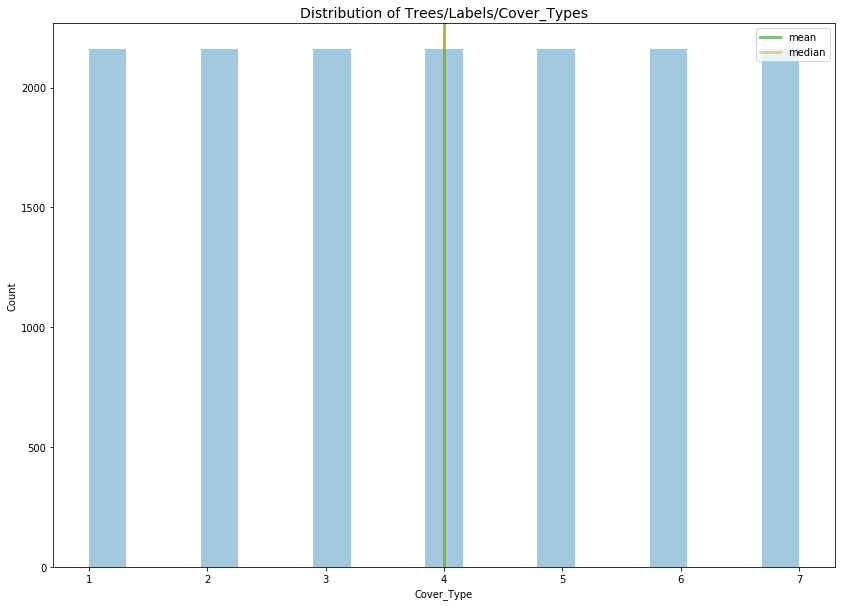

In [11]:
# set the plot size
figsize(14,10)

# set the histogram, mean and median
sns.distplot(trees["Cover_Type"], kde=False)
plt.axvline(x=trees.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=trees.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

Distribution of fantastic trees shows perfect uniform distribution.

Here are the 7 types of the fantastic trees, numbered from 1 to 7 in the `Cover_Type` column:

1) Spruce/Fir

2) Lodgepole Pine

3) Ponderosa Pine

4) Cottonwood/Willow

5) Aspen

6) Douglas-fir

7) Krummholz

## 2.4. Check if the Cover_Type shows non-uniform distribution among different Wilderness_Areas

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

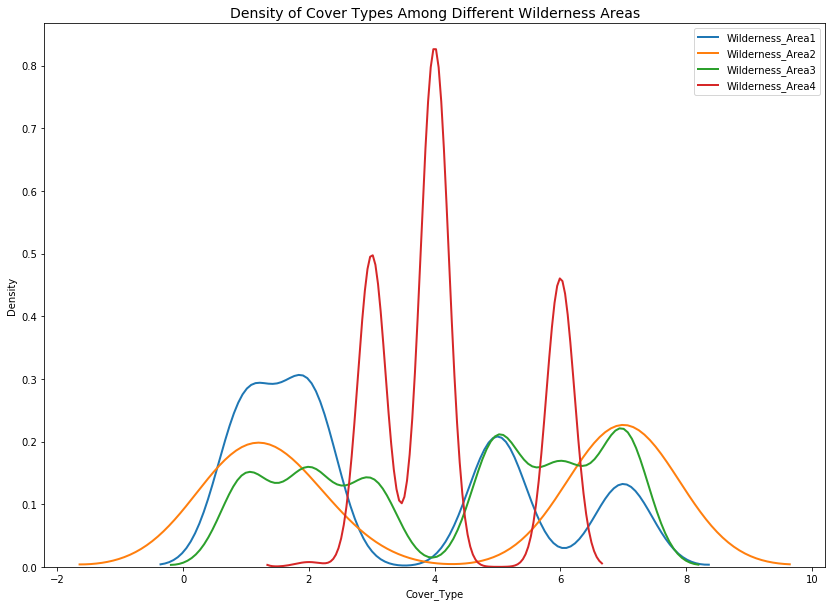

In [12]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
trees['Wilderness_Area_Type'] = (trees.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(trees['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
figsize(14,10)

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = trees[trees['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

Nother important finding about Fantastic Trees: Wilderness area is an important feature to determine the cover type:
* Spruce/Fir, Lodgepole Pine and Krummholz (Cover_Type 1, 2, 7)  mostly found in Rawah, Neota and Comanche Peak Wilderness Area(1,2 and 3).
* It is highly likely to find Ponderosa Pine (Cover_Type 3) in Cache la Poudre Wilderness Area (4) rather than other areas.
* Cottonwood/Willow (Cover_Type 4) seems to be found only in Cache la Poudre Wilderness Area (4).
* Aspen (Cover_Type 5) is equally likely to come from wilderness area Rawah and Comanche (1,3).
* Douglas-fir (Cover_Type 6) can be found in any of the wilderness areas.

## 2.5. Understanding the Soil_Type and Cover_Type relationship

Since different soil types might appear in different wilderness areas, I am going to consider different wilderness areas while examining this relationship.

In [13]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [14]:
reverse_one_hot_encode(trees, 16, 56, "Soil_Type")

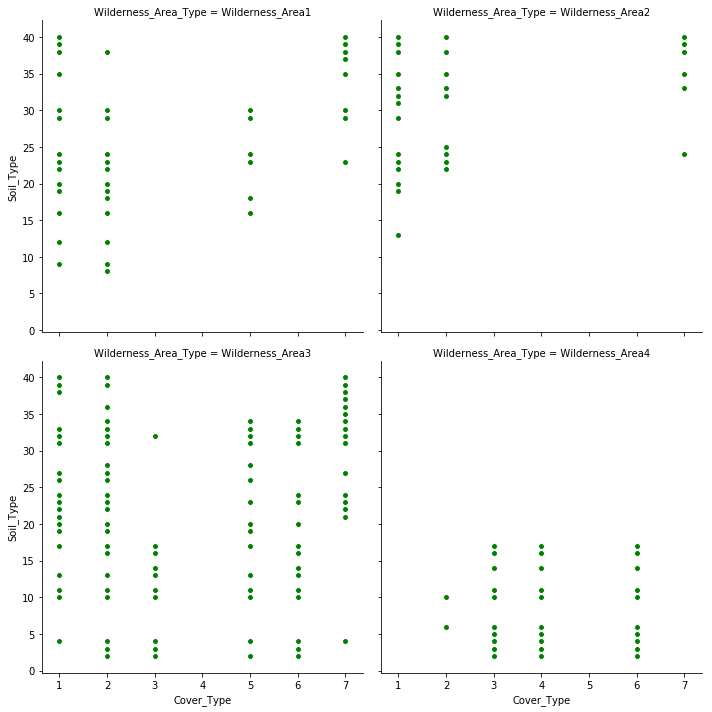

In [15]:
# plot relationship of soil type and cover type among different wilderness areas
g = sns.FacetGrid(trees, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=wilderness_areas)
g = g.map(plt.scatter,"Cover_Type", "Soil_Type", edgecolor="w", color="g")

* Wilderness Area 3 is more diverse in soil type and cover type.
* Only soil types 1 through 20 is represented in Wilderss Area 4, thus cover types in that area grew with them.
* Cover type 7 seems to grow with soil types 25 through 40.
* Cover Type 5 and 6 can grow with most of the soil types.
* Cover Type 3 loves soil type 0 through 15.
* Cover Type 1 and 2 can grow with any soil type.

## 2.6. Distribution and relationship of continuous variables (Elevation, Aspect, Slope, Distance and Hillsahde columns)

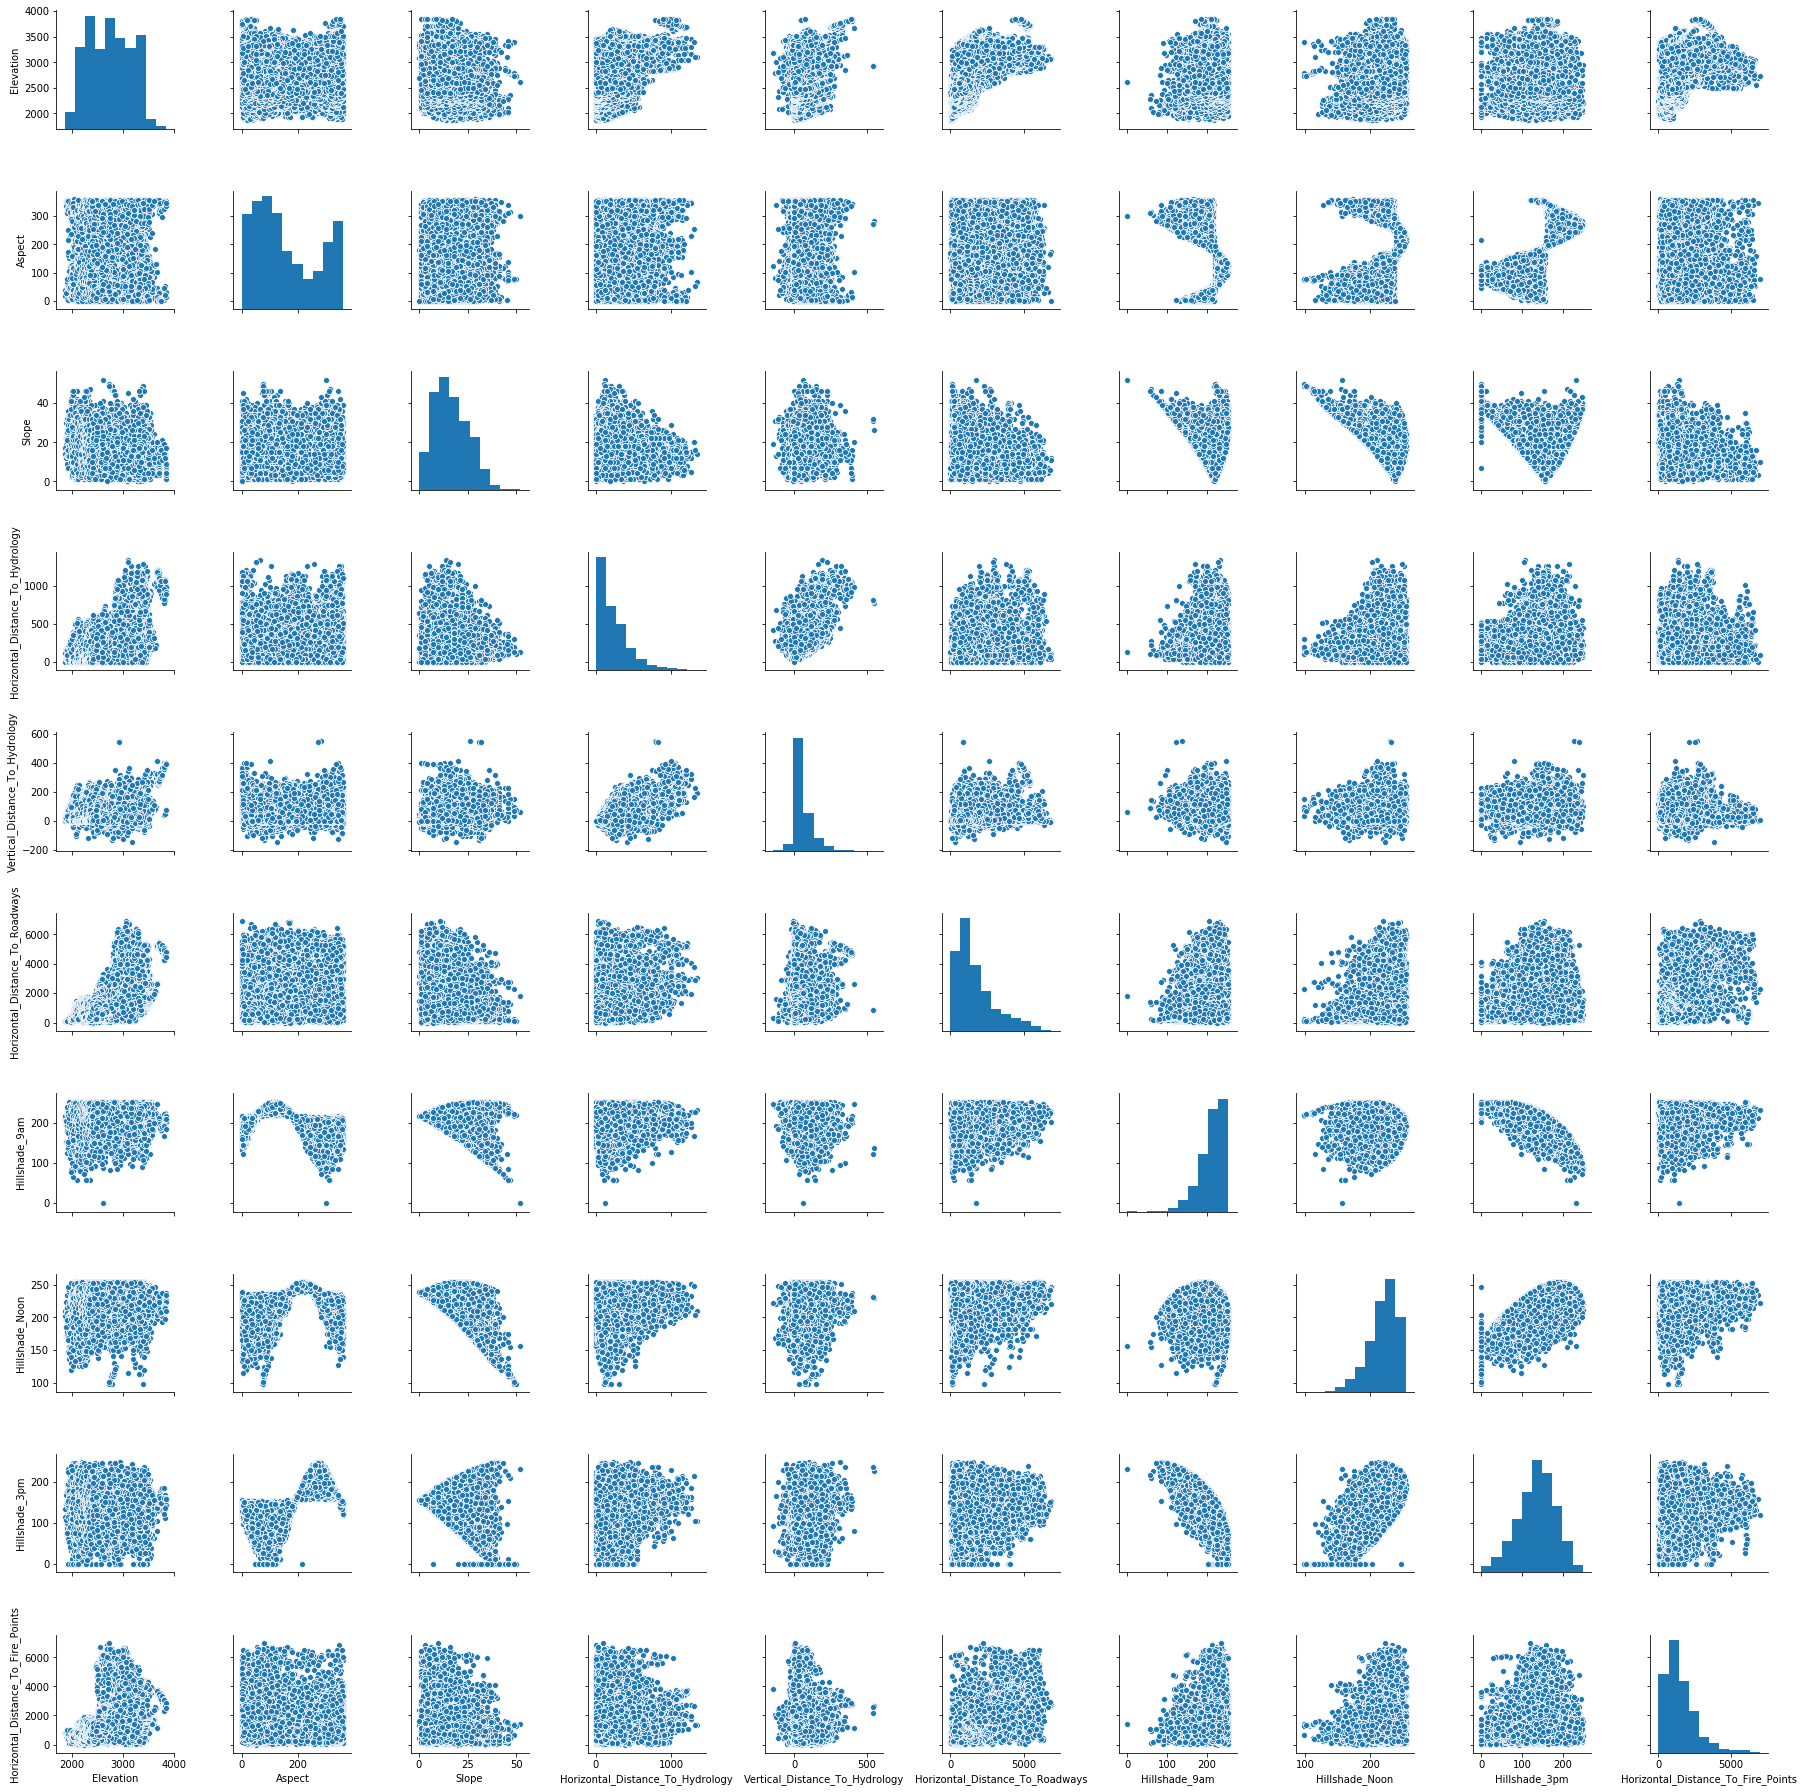

In [16]:
# store continious variables in a list
continuous_variables = trees.columns[1:11].tolist()

g = sns.pairplot(trees[continuous_variables])

**Distributions:**
* `Hillshade_9am` and `Hillshade_Noon` has bi-modal and left-skewed distributions.
* `Horizontal_Distance_To_Firepoints`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Hydrology` has bi-modal and right-skewed distributions.
* `Elevation` (height of a fantastic trees) resembles a uniform distribution.
* `Slope`, `Vertical_Distance_To_Hydrology`, `Hillshade_3pm` shows a symmetric and bi-modal distribution.

**Some obvious relationships between the continuous features:**
*  `Elevation` and `Horizontal_Distance_To_Hydrology` shows positive trend with following variables:
   * `Horizontal_Distance_To_Hydrology`
   * `Horizontal_Distance_To_Roadways`
   * `Horizontal_Distance_To_Firepoints`
* As `Aspect` increases; `Hillshade_Noon` and `Hillshade_3pm` increases.
* `Slope` has negative trend with:
    * `Elevation`
    * `Horizontal_Distance_To_Roadways`
    * `Hillshade_9am`, `Hillshade_Noon` and `Hillshade_3pm`
    * `Horizontal_Distance_To_Firepoints`
* `Vertical_Distance_To_Hydrology` - `Slope` and `Vertical_Distance_To_Hydrology` - `Horizontal_Distance_To_Hydrology` has obvious collinear relationship.
* As `Horizontal_Distance_To_Roadways` increases, `Horizontal_Distance_To_Firepoints` increases and `Slope` decreases.
* `Hillshade_9am` shows negative trend with `Hillshade_3pm` and `Aspect`, as `Hillshade_9am` increases `Elevation` increases.
* `Hillshade_Noon` has positive trend with:
    * `Elevation`
    * `Aspect`
    * `Horizontal_Distance_To_Roadways`
    * `Hillshade_3pm` 
    * `Horizontal_Distance_To_Firepoints`
* `Hillshade_3pm` shows perfect negative relationship with `Hillshade_9am` and perfect positive relationship with `Hillshade_Noon`.

**Some Collinear features:**
* hillshade noon - hillshade 3 pm
* hillsahde 3 pm - hillshade 9 am
* vertical distance to hydrology - horizontal distance to hydrology
* elevation - slope

## 2.7. Visualize some collinear features with Cover_Type

Text(0.5, 1.0, 'Elevation VS Slope')

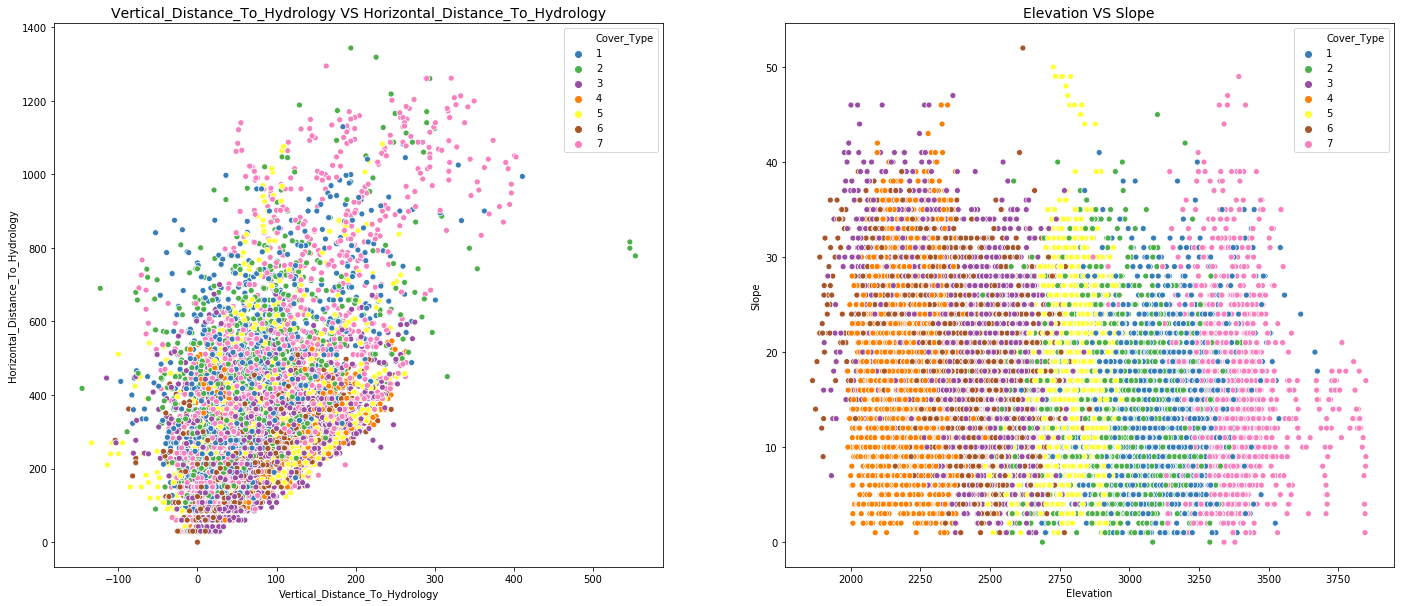

In [17]:
figsize(24,10)

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=trees, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Elevation", y="Slope", 
                hue="Cover_Type", data=trees, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Elevation VS Slope", size=14)

Text(0.5, 1.0, 'Hillshade_9am VS Hillshade_3pm')

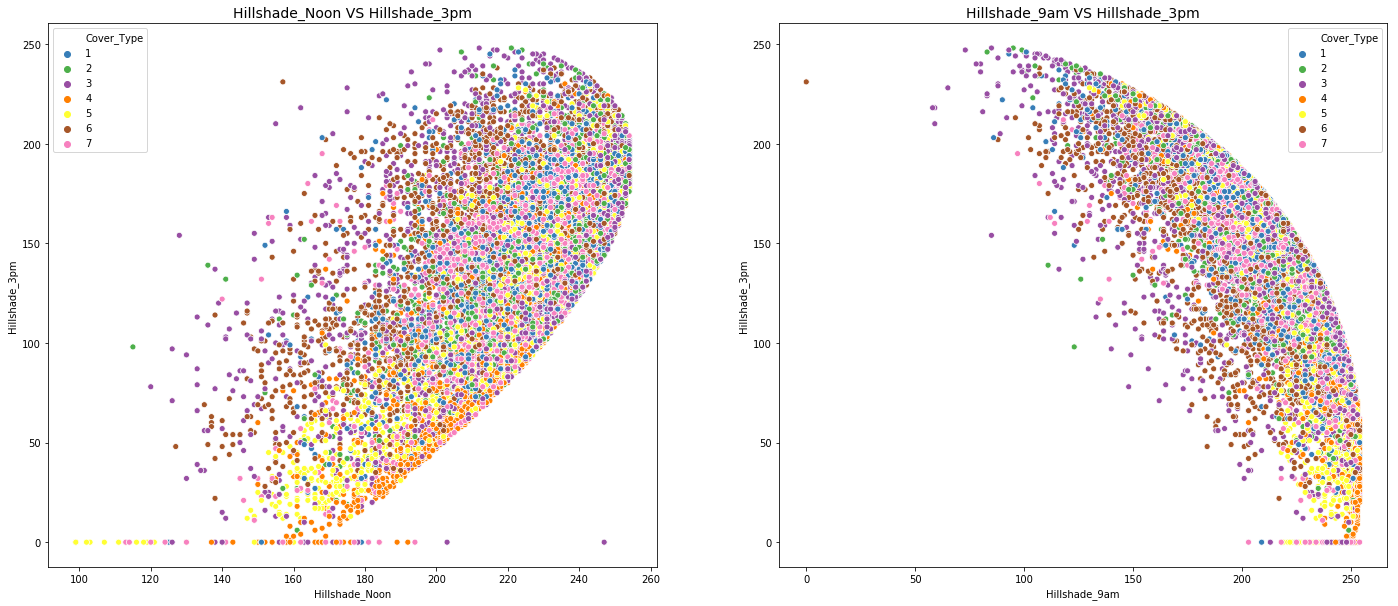

In [18]:
figsize(24,10)

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=trees, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=trees, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)

One of the features from the Hillshade_9am or Hillshade_3pm or Hillshade_Noon will be dropped when determining the training set. Which one to be eliminated will be determined after looking at the Pearson Coeffiecients.

## 2.8. Pearson Coefficients of all features

Text(0.5, 1.05, 'Pearson Correlation of All Features')

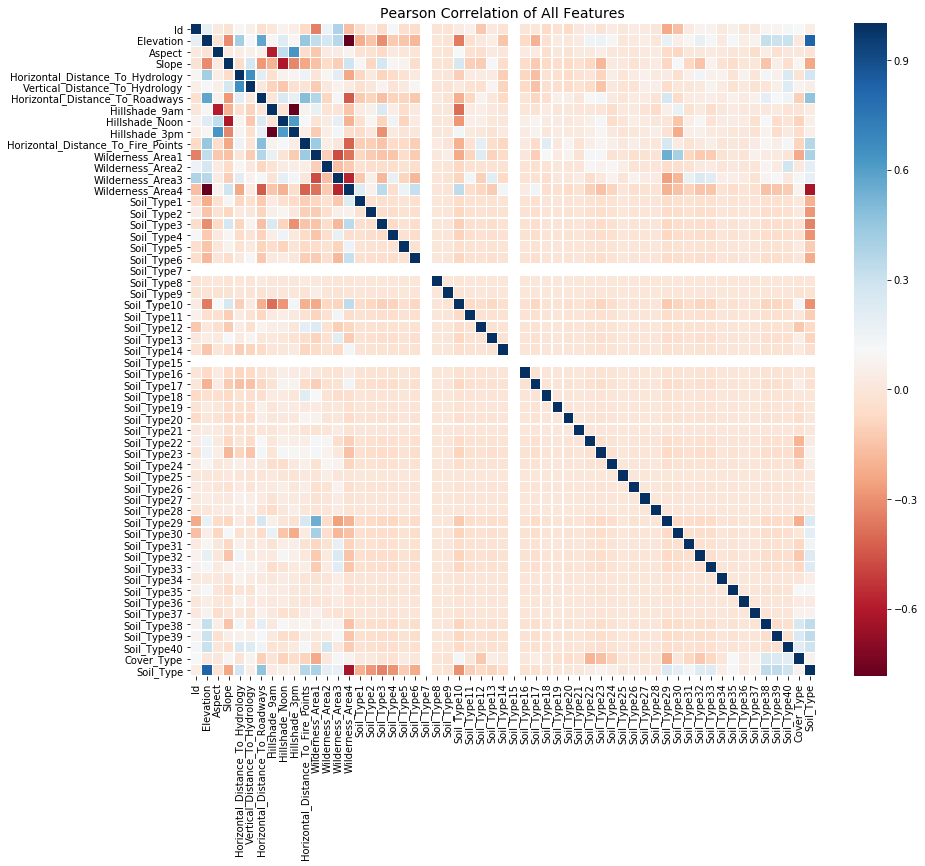

In [19]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(trees.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

None of the features are significantly different effect on determining the label cover type.

One interesting finding though, Soil Type 7 and 15 columns are blank in the heatmap, thus zero effect on determining the label Cover_Type. 

Approximately 5 (1 percent of all soil types) soil_type columns affects the cover type.

Can we get a better picture if we use soil_type as one numeric column rather than seperate one-hot-encoded columns?

## 2.9. Pearson coefficients with numeric Soil_Type representation

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

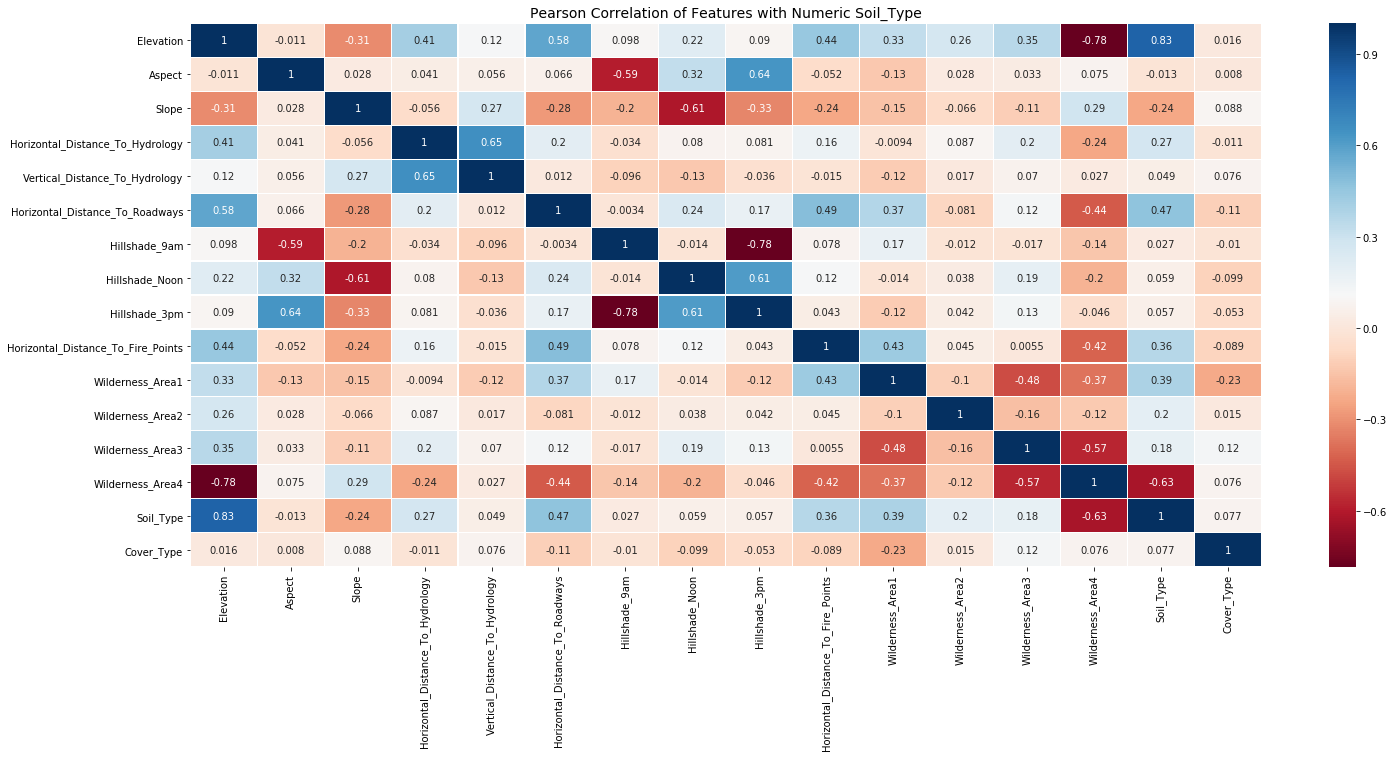

In [20]:
# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
trees_w_numeric_soil = trees[all_features_w_label]

# pearson coefficients with numeric soil type column
correlations = pd.DataFrame(trees_w_numeric_soil.corr())

figsize=(16,14)

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

**Exact Pearson Coefficients of the Correlation dataframe:**

In [21]:
correlations = pd.DataFrame(correlations["Cover_Type"]).reset_index()

# format, and display sorted correlations
correlations.columns = ["Feature", "Correlation with Cover_Type"]
correlations = (correlations[correlations["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
correlations

,Feature,Correlation with Cover_Type
10,Wilderness_Area1,-0.230117
5,Horizontal_Distance_To_Roadways,-0.105662
7,Hillshade_Noon,-0.098905
9,Horizontal_Distance_To_Fire_Points,-0.089389
8,Hillshade_3pm,-0.053399
3,Horizontal_Distance_To_Hydrology,-0.010515
6,Hillshade_9am,-0.010286
1,Aspect,0.008015
11,Wilderness_Area2,0.014994
0,Elevation,0.016090


Recall that Hillshade columns are collinear, looking at the above dataframe of correlations Hillshade_9am have the least effect in determining cover type, this column will be dropped when creating the training dataset.

## 2.10. Findings From Exploratory Data Analysis
<p> Dataset have balanced labels, we have equal number of cover types. This will be an advantage when it comes to apply classification ML models because, the model will have good chance to learn patterns of all labels, eliminating the probability of underfitting. <p/>
<p> Different wilderness areas consist of some specific trees. Interestingly, there is one fantastic tree, Cottonwood/Willow, specifically likes to grow in wilderness area 4. While cover types 1, 2, 5 and 6 can grow in any soil type, other cover types grows more with specific soil types. <p/>
<p> Soil types are reverse-one-hot-encoded, meaning they are going to be included as numeric data in the training set and one-hot-encoded soil type columns will be excluded. Numeric soil type column and other variables have pearson coefficients in the range of [-0.2, 0.1]. Hillshade columns are collinear within each other and `Hillshade_9_am`, which has the least importance among 3 of them, will be dropped when creating the training set. <p/>


# 3. Feature Engineering & Selection

## 3.1. Seperate labels from features in the training set

In [22]:
trees_training = trees_w_numeric_soil.drop(columns=["Hillshade_9am", "Cover_Type"])
labels_training = trees_w_numeric_soil["Cover_Type"].as_matrix()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


## 3.2. Split training set as training and validation set

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(trees_training, labels_training, test_size=0.2, random_state=1)

In [24]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)

Training Data Shape: (12096, 14)
Validation Data Shape: (3024, 14)


In [25]:
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Label Shape: (12096,)
Validation Label Shape: (3024,)


Training, validation and test set have the same number of columns.

## 3.3. Create a baseline metric

Before diving deep into the ML classification algorithms, I am going to calculate a common sense baseline. A common sense baseline is defined in this [article](https://towardsdatascience.com/first-create-a-common-sense-baseline-e66dbf8a8a47) in simple terms, how a person has a knowledge in that field would solve the problem without using any data science tricks. Alternatively, as explained in this [post](https://machinelearningmastery.com/implement-baseline-machine-learning-algorithms-scratch-python/), it can be a dummy or simple algorithm, consisting of few lines of code, to use as a baseline metric.

Baseline metrics can be [different](https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/) in regression and classification problems. Since fantastic trees will be classified into 7 groups and no expert wizards available around, I am going to use [dummy algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) from scikit-learn library. With that dummy algorithm, I will establish a baseline metric of accuracy which is percentage of correctly predicted trees among the test dataset .

Baseline metrics are important in a way that, if a ML model cannot beat the simple and intuitive prediction of a person's or an algorithm's guess, the original problem needs reconsideration or training data needs reframing.

In [26]:
# Create dummy classifer
dummy = DummyClassifier(strategy='stratified', random_state=1)

# train the model
dummy.fit(X_train, y_train)

# Get accuracy score
baseline_accuracy = dummy.score(X_valid, y_valid)
print("Our dummy algorithm classified {:0.2f} of the of the trees correctly".format(baseline_accuracy))

Our dummy algorithm classified 0.14 of the of the trees correctly


Now, I expect that following ML models beat the accuracy score of 0.14!

# 4. Compare Several Machine Learning Models

I am going to use (with default parameters for now):

1) K-Nearest Neighbors Classifier

2) Support Vector Machines

3) Random Forest Classifier

4) Gradient Boosting

and compare the results on accuracy score.

Since K-nearest neighbors classifier and support vector machines are using [euclidian distance](https://en.wikipedia.org/wiki/Euclidean_distance) to cluster labels, I am going to use normalized training set for those.

## 4.1. Z-Score normalization for K-Nearest Neighbors and Support Vector Machines

Here is the definition from the Scikit-Learn [documentation](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html):
> Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. Many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized.

In [27]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

## 4.2. Build models

In [28]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

### 4.2.1. K-Nearest Neighbor Classifier

In [29]:
# create model apply fit_evaluate_model
knn_classifier = KNeighborsClassifier()
knn_accuracy = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", knn_accuracy)

Number of correct predictions made out of all predictions are: 0.7767857142857143


### 4.2.2. Support Vector Machines Classifier

In [30]:
# create model apply fit_evaluate_model
svm_classifier = SVC()
svm_accuracy = fit_evaluate_model(svm_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", svm_accuracy)

Number of correct predictions made out of all predictions are: 0.7632275132275133


### 4.2.3. Random Forest Classifier

In [31]:
# create model apply fit_evaluate_model
rf_classifier = RandomForestClassifier()
rf_accuracy = fit_evaluate_model(rf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", rf_accuracy)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of correct predictions made out of all predictions are: 0.8382936507936508


### 4.2.4. Gradient Boosting Classifier

In [32]:
# create model apply fit_evaluate_model
gb_classifier = GradientBoostingClassifier()
gb_accuracy = fit_evaluate_model(gb_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", gb_accuracy)

Number of correct predictions made out of all predictions are: 0.7946428571428571


## 4.3. Comparison of model performances

Text(0.5, 1.0, 'Accuracy Score of Different Models')

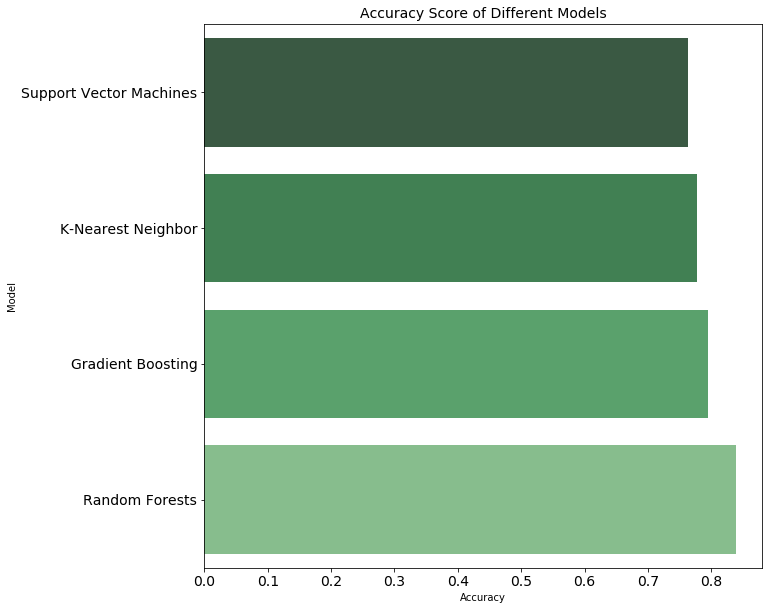

In [33]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Support Vector Machines", "Random Forests", "Gradient Boosting"],
                                       "Accuracy": [knn_accuracy, svm_accuracy, rf_accuracy, gb_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

Although it is known that gradient boosting algorithm outperforms random forests, as plotted below heatmap, random forests outperformed gradient boosting with accuracy performance metric in this case. The reason might be, I did not focus on tuning the parameters of the each algorithm and used defaults values instead.

![image](https://crossinvalidation.files.wordpress.com/2017/08/olson.jpg?w=900)

Do you remember our baseline metric produced by the dummy algorithm (0.14) ? Well, all 4 models beat that intuitive score and showed that machine learning is applicable to the fantastic tree classification problem!

# 5. Perform Hyperparameter Tuning on the Best Model

Now, I am going to perform hyperparameter tuning on the best model (random forests classifier) and try to improve accuracy of the model. Seraching and setting the best and optimal set of parameters for a machine learning model can be defined as hyperparameter tuning.

80% accuracy can be interpreted as a reasonable score and managed not to fall the areas of underfitting or overfitting. We would call our model as underfit if we would get an accuracy score slightly more than the baseline metric, meaning the model fails to catch and learn from the patterns in the training set.

On the other hand, an accuracy score of more than 95% might show that the model already in the overfitted area. Meaning the model performed very well on the training data and captured the patterns but it might not show the same performance on the test data set. So one cannot conclude that the higher performance metric is always better.

Let's see if I can improve the accuracy of the model by playing with the parameters of [random forests classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) without falling into overfitting area.

## 5.1. Hyperparameter Tuning with Random Search and Cross-Validation

I am going to search for the best set of parameters with random search and cross validation.

In random serach, set of ML model's parameters are defined in a range and inputted to `RandomizedSearchCV`. This algorithm randomly selects some combination of the parameters and compares the defined `score` (accuracy, for this problem) with iterations. Random search runtime and iterations can be controlled with the parameter `n_iter`. This is in contrast to grid search iterations of every single combination of the given parameters. With intuition, one can say that, grid search requires more run-time than random search if a small number of n_iterations is defined. Generally, random search is better when there is a limited knowledge and of the best model hyperparameters and less time. 

K-fold Cross validation is the method used to assess the performance of the hyperparameters on the whole dataset. Rather than splitting the dataset set into 2 static subsets of training and test, dataset is divided equally for the given K, and with iterations different K subsets are trained and tested. In other words, divide the dataset into K folds, and follow the iterative process where first traininig is done on K-1 of the folds and then evaluate performance on the Kth fold. Process is repeated K times, so eventually dataset is tested on every example keeping in mind that each iteration is testing on a subset that did not train on before. At the end of K-fold cross validation, average of the performance metric on each of the K iterations substitutes the final performance measure.

A visualization of cross-validation:

![image](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


To perform hyperparameter tuning, I am going to define set of parameters and `RandomizedSearchCV` will look for the best combination with cross validation. So, randomly one single element is chosen from the below lists in each iteration. When the iteration is complete on each k-folds best set of parameters can be detected.

In [34]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [100, 250, 500, 1000, 1500]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

To find the best combination of the randomly set parameters and apply cross validation, I am going to use the `RandomizedSearchCV` with following arguments:
* `estimator`: the model
* `param_distributions`: the distribution of parameters we defined
* `cv`: K in the K-fold cross validation, number of subsets to create
* `n_iter`: the number of different combinations to try
* `scoring`: which metric to use when evaluating candidates
* `n_jobs`: number of cores to run in parallel (-1 will use all available)
* `verbose`: how much information to display (1 displays a limited amount)
* `return_train_score`: return the training score for each cross-validation fold
* `random_state`: fixes the random number generator used so we get the same results every run

In [35]:
# create model
model = RandomForestClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=10, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [36]:
# Fit on the all training data using random search object
random_cv.fit(trees_training, labels_training)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [37]:
random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Here is the best combination of parameters:
* `n_estimators` = 500
* `max_features` = None
* `min_samples_leaf`= 1
* `min_samples_split`= 2

Let's apply those parameters to the random forests classifier model and see observe the improvement on the accuracy score.

In [38]:
optimal_model_w_random_search = RandomForestClassifier(n_estimators=500, 
                                                       max_features=None, 
                                                       min_samples_leaf=1, 
                                                       min_samples_split=2,
                                                       random_state=42)

rf_accuracy_opt_w_rand_search = fit_evaluate_model(optimal_model_w_random_search, X_train, y_train, X_valid, y_valid)

In [39]:
print("Accuracy score in the previous random forests model:", rf_accuracy)
print("Accuracy score after hyperparameter tuning:", rf_accuracy_opt_w_rand_search)

Accuracy score in the previous random forests model: 0.8382936507936508
Accuracy score after hyperparameter tuning: 0.8601190476190477


After the hypermeter parameter tuning I increased the accuracy of the model by 2 to 3 points.

## 5.2. Possible further improvements with the GridSearch

With the random search, I am able to define a best set of parameters (might change for a different case and set of parameters though) as mentioned above. 

To recap, first I used default parameter settings to find which algorithm yields best performance. Then, I improved performance of the best selected algorithm (random forest classifier) by narrowing down to the set of parameters with random search.

Now, I am going to look if there is any room left for further improvement in accuracy score in the algorithm. I am going to look for that improvement in the `n_estimator` parameter, (number of decision trees used in the random forests). Having the possibility of long run-times in mind, I will use GridSearch with parameter n_estimators and pass a 6-element list as input, to keep the run-time at reasonable minutes. 

Like random search, grid search also performs its search on whole data set with k-fold cross validation. I am going to use 5-fold cross validation as I did for random search.

In [40]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [50, 250, 500, 750, 1000, 1500]}

# define all parameters except n_estimators
optimal_model_w_grid_search = RandomForestClassifier(max_features=None, 
                                                     min_samples_leaf=1, 
                                                     min_samples_split=2,
                                                     random_state=42)

# Grid Search Object using the trees range, the model and 5-fold cross validation
grid_search = GridSearchCV(estimator = optimal_model_w_grid_search, param_grid=trees_grid, 
                           cv = 5, scoring = 'accuracy', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [41]:
# fit the dataset to grid search object
grid_search.fit(trees_training, labels_training)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_es

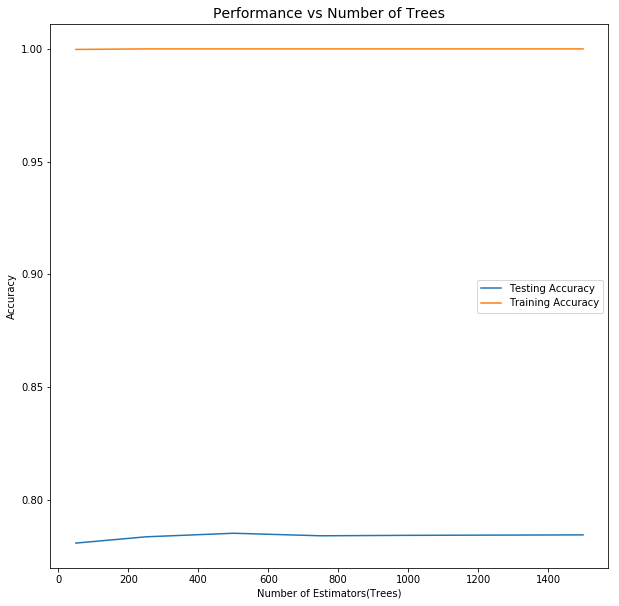

In [42]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(10,10))
plt.plot(results['param_n_estimators'], results['mean_test_score'], label = 'Testing Accuracy')
plt.plot(results['param_n_estimators'], results['mean_train_score'], label = 'Training Accuracy')

# set title, labels and legend
plt.xlabel('Number of Estimators(Trees)'); plt.ylabel('Accuracy'); plt.legend();
plt.title('Performance vs Number of Trees', size=14);

Training accuracy is always 100% percent, showing that the model studied and learned from the training set very well. 

When it comes to testing accuracy, accuracy drops 20 points, resulting in accuracy level around 80%. This shows that the model is performing worse in a newly-introduced dataset.
More importantly, this might be a sign for overfitting where the model fails to generalize patterns found in the training set to the test set. One solution to this could be reducing the model complexity by revisiting the hyperparameter tuning.

Another important message is, testing set has a very tiny peak at n_estimator=500 meaning the best number of trees (500) already implemented into the model and there is no further room for improvement in terms of number of trees used.

For now, I will keep n_estimators=500 and submit results to the competition with the parameters set in the section 5.1.

## 5.3. Visualization of the best model predictions

I am going to use the [function](https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823) mentioned in the sci-kit learn documentation to print confusion_matrix. Confusion matrix will show the number of predictions made in each category with actual and predicted values, by comparing the actual labels and the prediected labels. 

Fantastic tree confusion matrix will be a 7x7 matrix. I will use normalized confusion matrix, so percentage of actual tree type correctly guessed out of all guesses in that particular category will appear in the diagonal of the matrix and non-diagonal elements will show misslabeled elements by the model. The higher the diagonal percentages of the confusion matrix the better, indicating many correct predictions.

In [43]:
# create set of y_predictions
y_predicted = optimal_model_w_random_search.predict(X_valid)

In [44]:
# make a list of cover_types
cover_types = sorted(trees['Cover_Type'].value_counts().index.tolist())

In [45]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


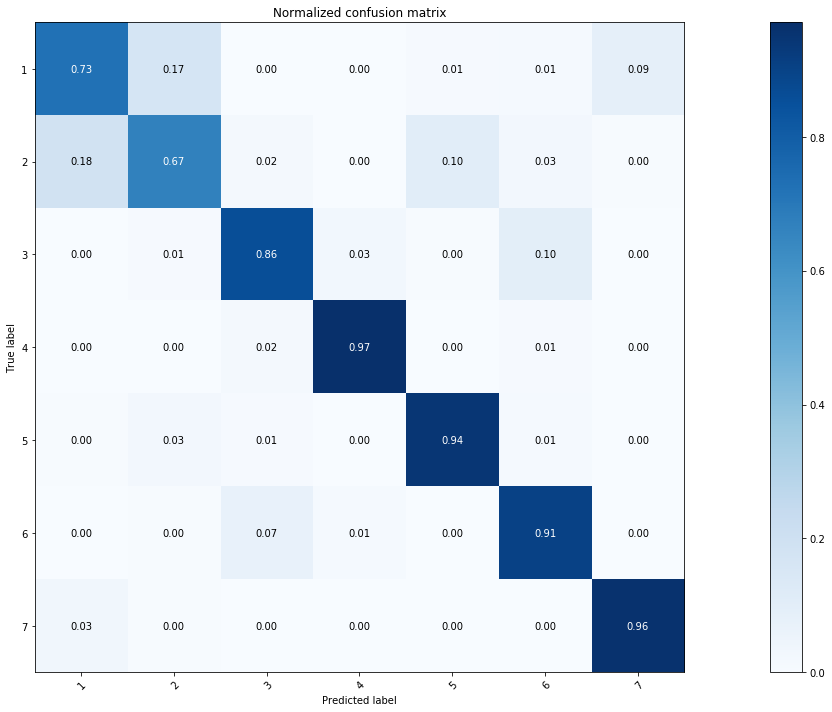

In [46]:
plot_confusion_matrix(y_valid, y_predicted, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Model did pretty good detecting fantastic trees of type 4, 5, 6 and 7, and it seems a bit confused to detect types 1 and 2.

# 6. Evaluate the Best Model with Test Data

## 6.1. Align test set with the training set

In [47]:
trees_test = pd.read_csv("/kaggle/input/learn-together/test.csv")

In [48]:
# add numeric soil type column
reverse_one_hot_encode(trees_test, 16, 56, "Soil_Type")

In [49]:
# drop id, hillshade 9am and soil_type 1-40 columns and create X_test
X_test = trees_test[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                     'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                     'Hillshade_Noon','Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
                     'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3','Wilderness_Area4', 'Soil_Type']]
print(X_test.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type'],
      dtype='object')


## 6.2. Make sure of the test data shape and there aren't any missing values

In [50]:
print('Test Data Shape:', X_test.shape)

Test Data Shape: (565892, 14)


In [51]:
print(X_test.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type                             0
dtype: int64


There are no NA values in the test data set, which is ready to be inputted in a ML model.
In the training set, there are more than 12000 rows, and the test has much more rows (almost 500.000) than the tarining set. Let's see how the model will deal with a much bigger dataset!

In [52]:
# generate predictions for test data
test_predictions = optimal_model_w_random_search.predict(X_test)

In [53]:
# write results to the dataframe and create file for submission
output = pd.DataFrame({'Id': trees_test["Id"],
                       'Cover_Type': test_predictions})
output.to_csv('submission.csv', index=False)

# 7. Interpret Model Results

## 7.1. Feature importances

Remember, in the exploratory data analysis I looked at the pearson coeffients of the features. Since final results are generated, I will revisit this picture and observe features with the highest contribution to the model predictions. `feature_importances` attribute will be used for this.

In [54]:
#create list of features
features = list(trees_training.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': features, 
                                'importance': optimal_model_w_random_search.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
feature_results.head(10)

,feature,importance
0,Elevation,0.345158
1,Soil_Type,0.173821
2,Horizontal_Distance_To_Roadways,0.091422
3,Horizontal_Distance_To_Fire_Points,0.091335
4,Horizontal_Distance_To_Hydrology,0.071396
5,Aspect,0.050731
6,Vertical_Distance_To_Hydrology,0.042492
7,Hillshade_3pm,0.042364
8,Hillshade_Noon,0.036153
9,Slope,0.026605


So ordering changed, in the correlations dataframe top ten features were:
* `Wilderness_Area1`: -0.230117
* `Horizontal_Distance_To_Roadways`: -0.105662
* `Hillshade_Noon`: -0.098905
* `Horizontal_Distance_To_Fire_Points`: -0.089389
* `Hillshade_3pm`: -0.053399
* `Horizontal_Distance_To_Hydrology`: -0.010515
* `Hillshade_9am`: -0.010286
* `Aspect`: 0.008015
* `Wilderness_Area2`: 0.014994
* `Elevation`: 0.016090
* `Vertical_Distance_To_Hydrology`: 0.075647
* `Wilderness_Area4`: 0.075774 

This change might be caused by the model selection and hyperparameter tuning performed.

# 8. Summary & Conclusisons

Now it is time to answer the headline!

## 8.1. Where to Find Fantastic Trees?

Spruce/Fir, Lodgepole Pine and Krummholz loves to hangout in Rawah, Neota and Comanche Peak Wilderness Area.

Cache la Poudre Wilderness Area is perfect place for Ponderosa Pine and Cottonwood/Willow.

If you see an Aspen suspect that you might be at the Rawah or Comanche.

Douglas-fir is an easy going species, that goes along with any wilderness area.

## 8.2. How to Detect Fantastic Trees?

To recognize fantastic trees, I analyzed them first, determined and transformed some of their features (like characteristics). 

To classify them, I implemented a random forest classifier model (how funny that fantastic trees are classifed with random forests model), fine tuned the model and generated predictions. 

**Most importantly: **

With the current workflow, and selection of features, model and parameters I succesfully detected 72 percent of the fantastic trees correctly!

Random forests classification showed that, elevation, soil type, horizontal distance to roadways, horizontal distance to fire points, horizontal distance to hydrology and aspect are the most important characteristics of a fantastic tree.

![end credits](https://i.ytimg.com/vi/WfvD-JZGlHs/maxresdefault.jpg)

### Stay tuned for the fantastic trees correct detection rate increasing to 75% ;)

### And many thanks for reading until the end, if I am able to share my knowledge with you or at least created some inspiration in you, I will appreciate your upvote.